# 0. Введение

### Существует платформа Fandango, где можно приобрести билеты в кино через интернет. Fandango получает процент от продажи билетов. Также есть предположение о том, что Fandango может завышать рейтинги фильмов, чтобы привлечь больше зрителей и увеличить прибыль. Наша задача - проверить это предположение, анализируя данные оценок фильмов на Fandango и сравнивая их с оценками на других платформах.

### В файле "fandango_scrape" содержится информация об оценках каждого фильма. Данные представлены в следующих столбцах: 'FILM' (название фильма), 'STARS' (рейтинг фильма по версии Fandango), 'RATING' (рейтинг фильма по версии зрителей) и 'VOTES' (количество проголосовавших зрителей).

### Файл "all_sites_scores" содержит информацию о рейтингах каждого фильма. В нём присутствуют следующие столбцы: 'FILM' (название фильма), 'RottenTomatoes' (рейтинг фильма на RottenTomatoes от критиков), 'RottenTomatoes_User' (рейтинг фильма на RottenTomatoes от пользователей), 'Metacritic' (рейтинг фильма на Metacritic от критиков), 'Metacritic_User' (рейтинг фильма на Metacritic от пользователей), 'IMDB' (рейтинг фильма на IMDB от критиков), 'Metacritic_user_vote_count' (количество пользователей, проголосовавших на Metacritic) и 'IMDB_user_vote_count' (количество пользователей, проголосовавших на IMDB).

# 1. Импорт библиотек

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Импорт файла с данными Fandango и их проверка

In [62]:
file_path = r'E:\Портфолио\Анализ подлинности рейтингов на платформе Fandango\fandango_scrape.csv'
fand = pd.read_csv(file_path)
fand.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [63]:
fand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [64]:
fand.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


# 3. Анализ данных с сайта Fandango

## 3.1 Голоса и рейтинг

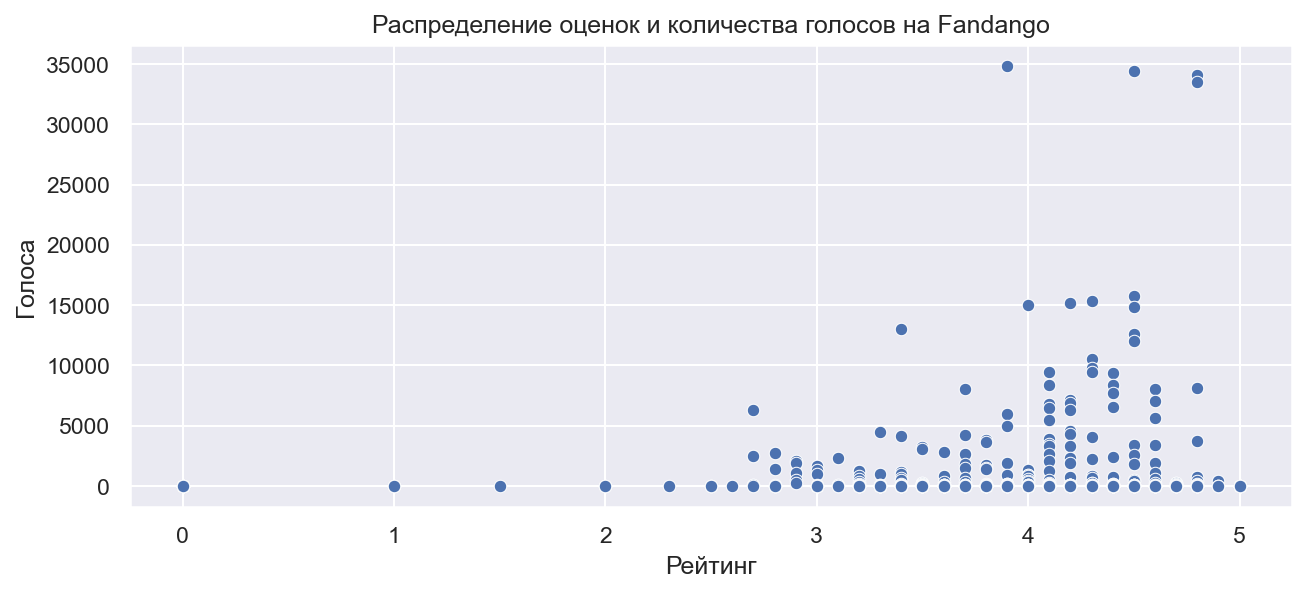

In [65]:
plt.figure(figsize=(10, 4), dpi=150)
sns.set(style='darkgrid')

sns.scatterplot(data=fand, x='RATING', y='VOTES')

plt.title('Распределение оценок и количества голосов на Fandango')
plt.xlabel('Рейтинг')
plt.ylabel('Голоса')

plt.show()

## 3.2 Корреляция между колонками

In [66]:
columns = fand.select_dtypes(include=['int64', 'int32', 'float64', 'float32']).columns
fand[columns].corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


## 3.3 Анализ годов

In [67]:
fand['YEAR'] = fand['FILM'].apply(lambda text: text.split('(')[-1].replace(')',''))
fand.head(2)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015


In [68]:
# кол-во фильмов по годам
fand['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

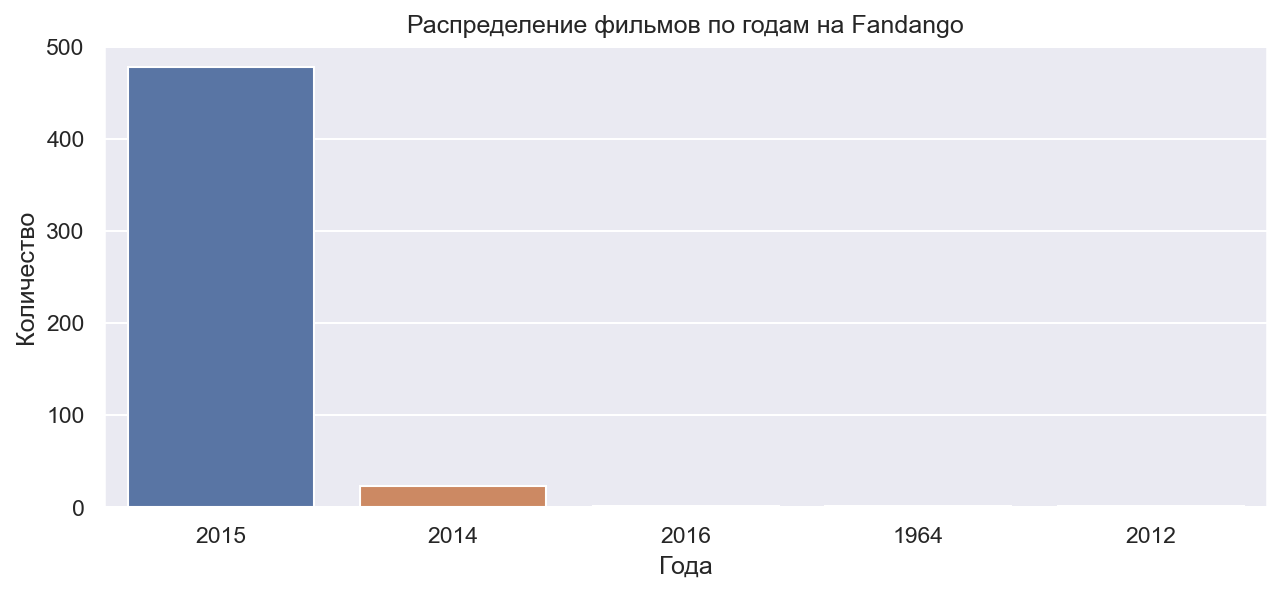

In [69]:
plt.figure(figsize=(10, 4), dpi=150)
sns.set(style='darkgrid')

sns.countplot(data=fand, x='YEAR')

plt.title('Распределение фильмов по годам на Fandango')
plt.xlabel('Года')
plt.ylabel('Количество')

plt.show()

## 3.4 Анализ голосов

In [70]:
# Топ 10 фильмов, получившие наибольшее кол-во голосов
fand.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [71]:
# сколько фильмов имеет нулевое кол-во голосов ( VOTES )
count = len(fand[fand['VOTES'] == 0])
print(f'{count} фильмов имеет нулевое кол-во голосов')

69 фильмов имеет нулевое кол-во голосов


In [72]:
# удаление строчек, которые не имеют голосов
fand = fand[fand['VOTES'] > 0]

## 3.5 Оценка Stars и Rating

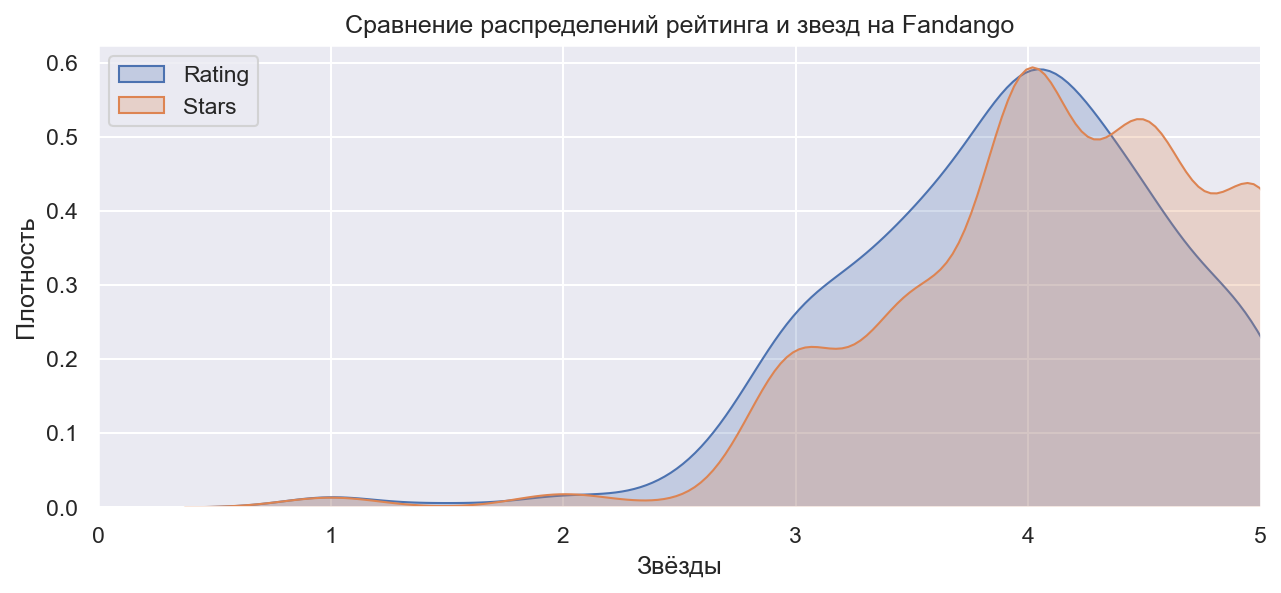

In [73]:
plt.figure(figsize=(10, 4), dpi=150)
sns.set(style='darkgrid')

sns.kdeplot(data=fand, x='RATING', fill=True, label='Rating')
sns.kdeplot(data=fand, x='STARS', fill=True, label='Stars')

plt.title('Сравнение распределений рейтинга и звезд на Fandango')
plt.xlabel('Звёзды')
plt.ylabel('Плотность')
plt.xlim(0, 5)

plt.legend(loc='upper left')
plt.show()

In [74]:
# численная разница между stars и rating
fand['STARS_DIFF'] = (fand['STARS'] - fand['RATING']).round(1)
fand.head(2)

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0


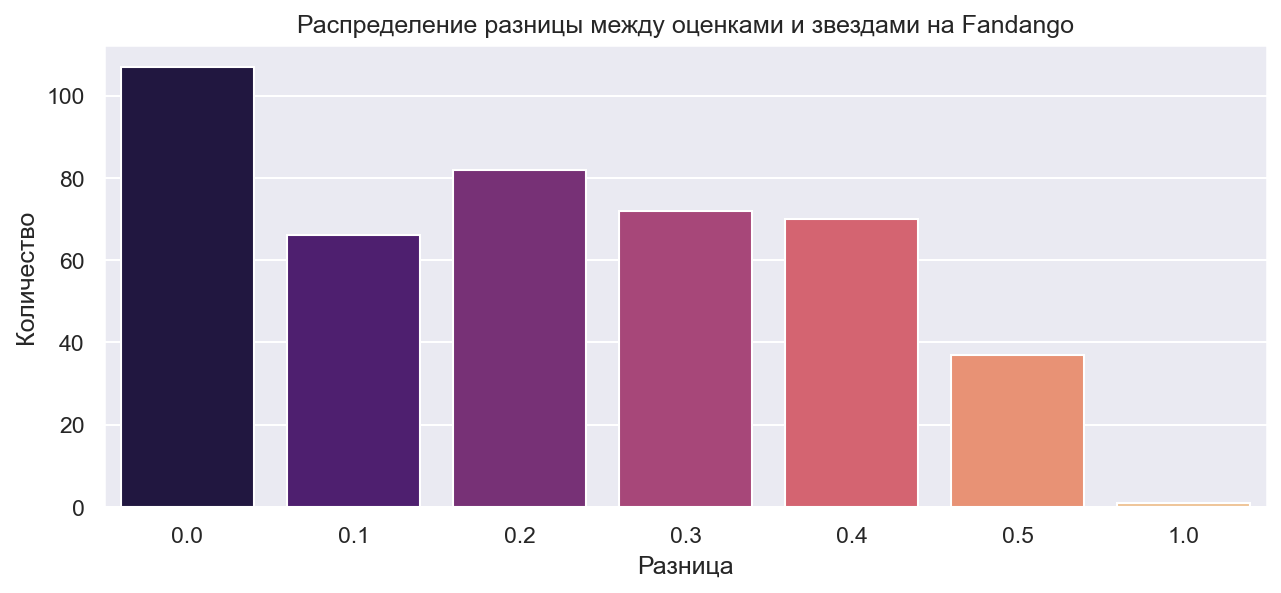

In [75]:
plt.figure(figsize=(10, 4), dpi=150)
sns.set(style='darkgrid')

sns.countplot(data=fand, x='STARS_DIFF', palette='magma')

plt.title('Распределение разницы между оценками и звездами на Fandango')
plt.xlabel('Разница')
plt.ylabel('Количество')

plt.show()

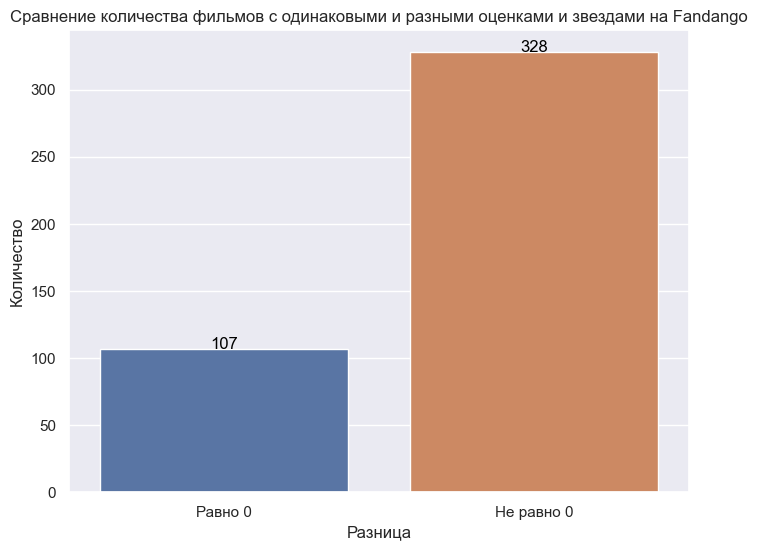

In [76]:
# Подсчет количества значений STARS_DIFF равных 0
zero_counts = len(fand[fand['STARS_DIFF'] == 0])

# Создание DataFrame для построения столбчатой диаграммы
data = pd.DataFrame({'Разница между оценками и звездами': ['Равно 0', 'Не равно 0'], 
                     'Количество фильмов': [zero_counts, len(fand) - zero_counts]})

plt.figure(figsize=(8, 6))
sns.set(style='darkgrid')

sns.barplot(data=data, x='Разница между оценками и звездами', y='Количество фильмов')

# Добавление текста с количеством над каждым столбцом
for index, row in data.iterrows():
    plt.text(index, row['Количество фильмов'], str(row['Количество фильмов']), color='black', ha="center")

plt.title('Сравнение количества фильмов с одинаковыми и разными оценками и звездами на Fandango')
plt.xlabel('Разница')
plt.ylabel('Количество')

plt.show()


In [77]:
# один из фильмов сайт Fandango переоценил на 1 звезду!
fand[fand['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


### Вывод 1: Сайт Fandango систематически завышает оценки фильмов и имеет тенденцию переоценивать их. Также следует учитывать, что количество фильмов, получивших завышенные оценки, значительно превышает количество тех, которые были оценены верно.

# 4. Сравнение рейтингов Fandango с рейтингами других сайтов

## 4.1 Импорт данных с других сайтов и их проверка

In [78]:
file_path = r'E:\Портфолио\Анализ подлинности рейтингов на платформе Fandango\all_sites_scores.csv'
all_sites = pd.read_csv(file_path)
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [79]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [80]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


# 4.2 Оценки пользователей и критиков с сайта RottenTomatoes

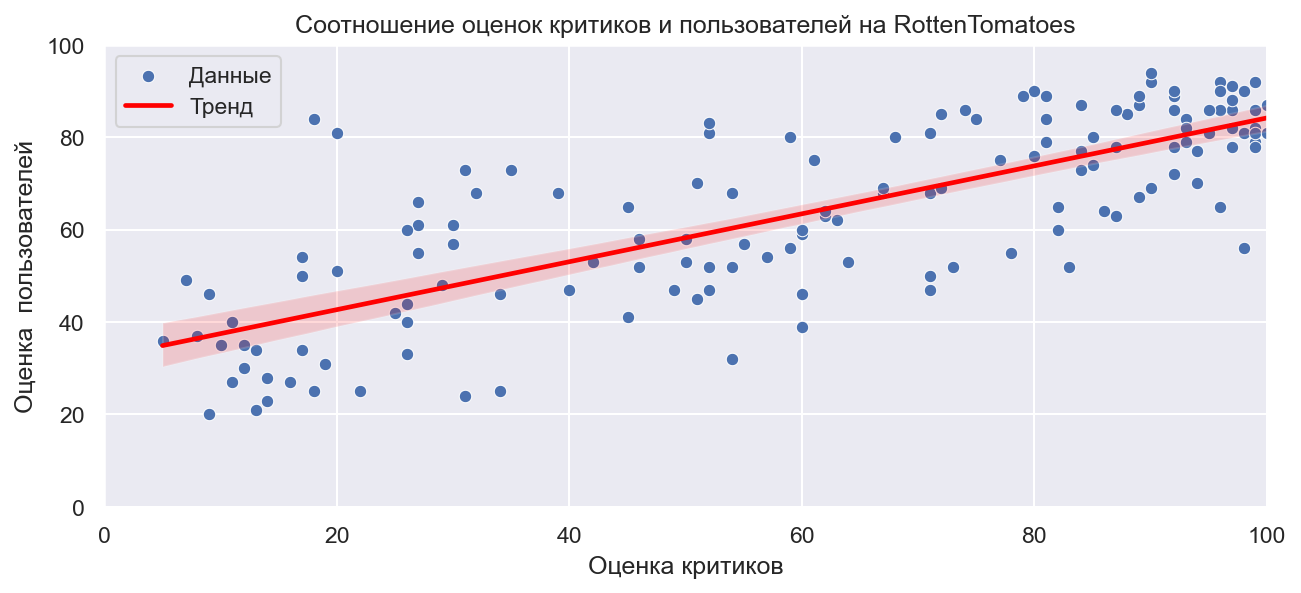

In [81]:
plt.figure(figsize=(10, 4), dpi=150)
sns.set(style='darkgrid')

sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User', label='Данные')
sns.regplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User', scatter=False, color='red', label='Тренд')

plt.title('Соотношение оценок критиков и пользователей на RottenTomatoes')
plt.xlabel('Оценка критиков')
plt.ylabel('Оценка  пользователей')

plt.xlim(0, 100)
plt.ylim(0, 100)

plt.legend(loc='upper left')
plt.show()

In [82]:
# корреляция между оценками
columns = ['RottenTomatoes', 'RottenTomatoes_User']
all_sites[columns].corr()

,RottenTomatoes,RottenTomatoes_User
RottenTomatoes,1.00000,0.78144
RottenTomatoes_User,0.78144,1.00000


In [83]:
# вычисление разницы между оценками пользователей и критиков
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [84]:
# насколько колонки критиков и пользователей в среднем отличаются
count = round(abs(all_sites['Rotten_Diff']).mean(), 1)
print(f'Средняя разница между колонками критиков и пользователей = {count}')

Средняя разница между колонками критиков и пользователей = 15.1


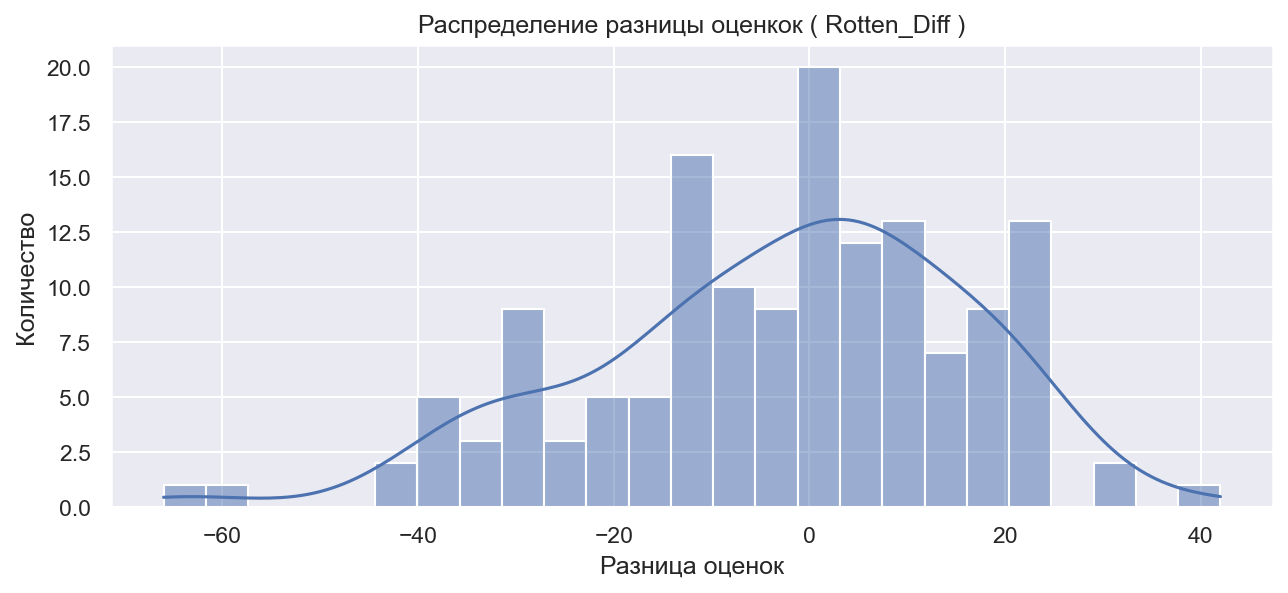

In [85]:
plt.figure(figsize=(10, 4), dpi=150)
sns.set(style='darkgrid')

sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25)

plt.title('Распределение разницы оценкок ( Rotten_Diff )')
plt.xlabel('Разница оценок')
plt.ylabel('Количество')

plt.show()

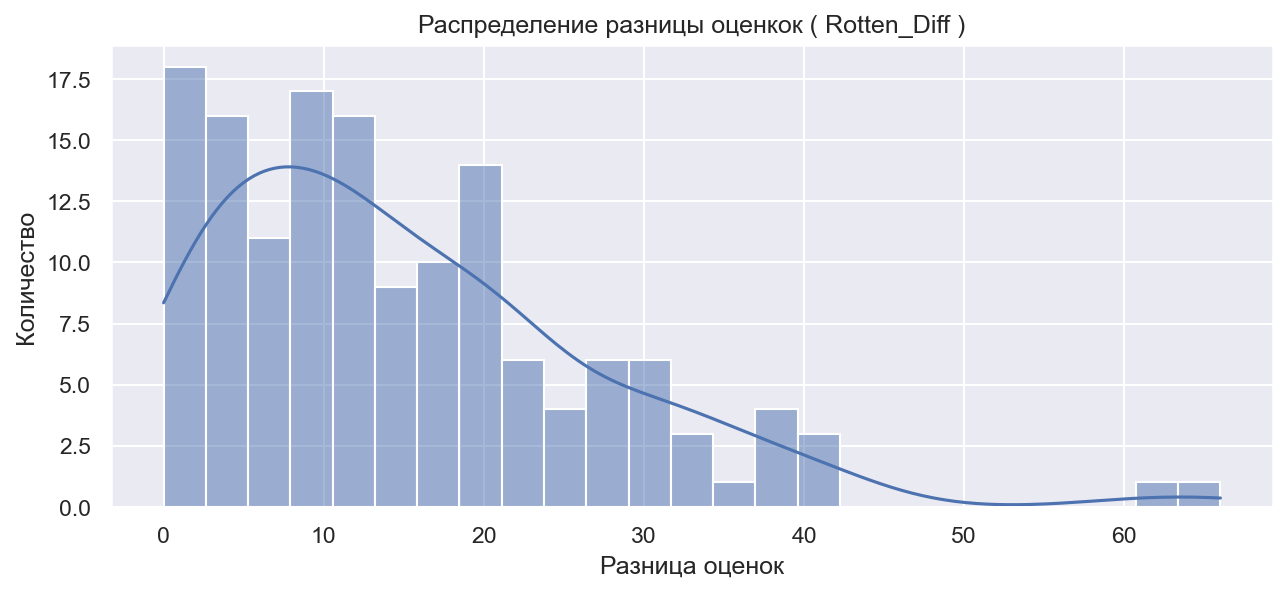

In [86]:
plt.figure(figsize=(10, 4), dpi=150)
sns.set(style='darkgrid')

sns.histplot(x=all_sites['Rotten_Diff'].apply(abs), kde=True, bins=25)

plt.title('Распределение разницы оценкок ( Rotten_Diff )')
plt.xlabel('Разница оценок')
plt.ylabel('Количество')

plt.show()

In [87]:
# Топ 5 фильмов, которые понравились пользователям, но не понравились критикам
all_sites.sort_values(by='Rotten_Diff').head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


# 4.3 Оценки пользователей и критиков с сайта Metacritic

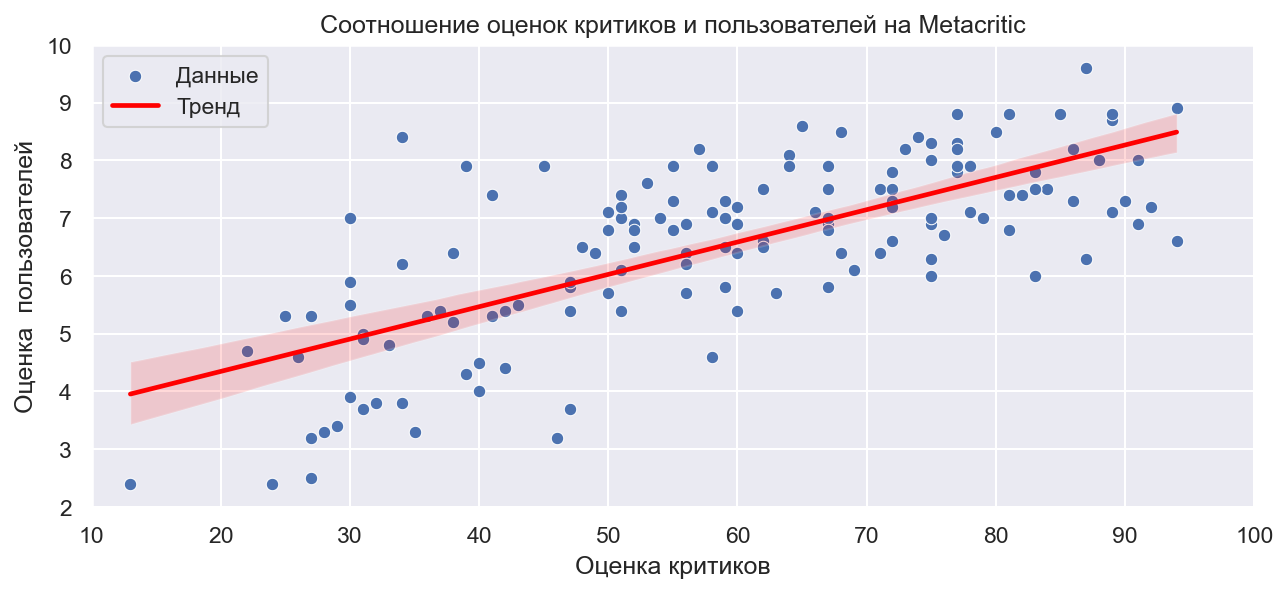

In [88]:
plt.figure(figsize=(10, 4), dpi=150)
sns.set(style='darkgrid')

sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User', label='Данные')
sns.regplot(data=all_sites, x='Metacritic', y='Metacritic_User', scatter=False, color='red', label='Тренд')

plt.title('Соотношение оценок критиков и пользователей на Metacritic')
plt.xlabel('Оценка критиков')
plt.ylabel('Оценка  пользователей')

plt.xlim(10, 100)
plt.ylim(2, 10)

plt.legend(loc='upper left')
plt.show()

In [89]:
# корреляция между оценками
columns = ['Metacritic', 'Metacritic_User']
all_sites[columns].corr()

,Metacritic,Metacritic_User
Metacritic,1.000000,0.723459
Metacritic_User,0.723459,1.000000


# 4.4 Оценка голосов с сайта IMDB

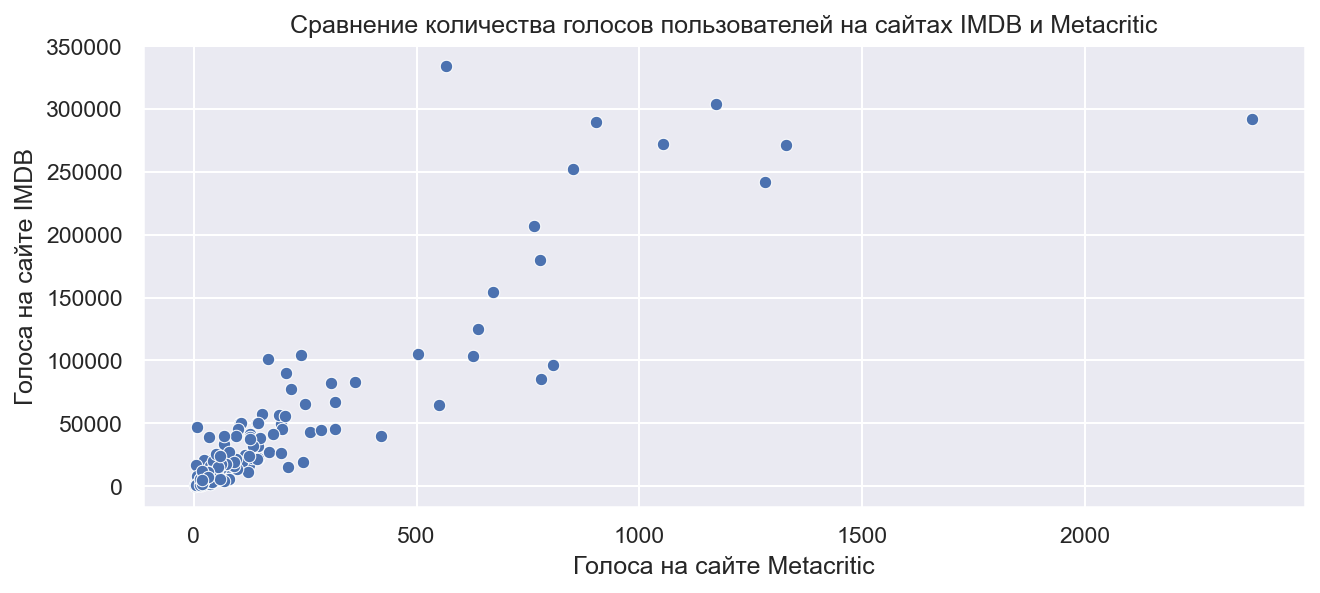

In [90]:
plt.figure(figsize=(10, 4), dpi=150)
sns.set(style='darkgrid')

sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

plt.title('Сравнение количества голосов пользователей на сайтах IMDB и Metacritic')
plt.xlabel('Голоса на сайте Metacritic')
plt.ylabel('Голоса на сайте IMDB')

plt.show()

In [91]:
# фильм, который получил наибольшее кол-во голосов по IMDB
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [92]:
# фильм, который получил наибольшее кол-во голосов по Metacritic
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# 5. Сравнение рейтингов Fandango и других сайтов

## 5.1 Создание нового DataFrame

In [93]:
# объединение двух df по фильмам
df = pd.merge(fand, all_sites, on='FILM', how='inner')
df.head(2)

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10


In [94]:
# поиск колонок, в которых нужно нормализовать оценки фильмов
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
STARS_DIFF                         0.5
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [95]:
ratings = {
    'RottenTomatoes': 100,
    'RottenTomatoes_User': 100,
    'Metacritic': 100,
    'Metacritic_User': 10,
    'IMDB': 10
}

data = pd.DataFrame(ratings.items(), columns=['Оценка на сайте', 'Максимальная оценка'])
print(data)


       Оценка на сайте  Максимальная оценка
0       RottenTomatoes                  100
1  RottenTomatoes_User                  100
2           Metacritic                  100
3      Metacritic_User                   10
4                 IMDB                   10


In [96]:
# нормализование колонок с оценками
df['RT_Norm'] = round(df['RottenTomatoes'] / 20, 1)
df['RTU_Norm'] = round(df['RottenTomatoes_User'] / 20, 1)

In [97]:
df['Met_Norm'] = round(df['Metacritic'] / 20, 1)
df['Met_U_Norm'] = round(df['Metacritic_User'] / 2, 1)

In [98]:
df['IMDB_Norm'] = round(df['IMDB'] / 2, 1)
df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Met_Norm,Met_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [99]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'STARS_DIFF',
       'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'Rotten_Diff', 'RT_Norm', 'RTU_Norm',
       'Met_Norm', 'Met_U_Norm', 'IMDB_Norm'],
      dtype='object')

In [100]:
# создание df только с нормализованными колонками
norm_scores = df[['STARS', 'RATING','RT_Norm', 'RTU_Norm',
                  'Met_Norm', 'Met_U_Norm', 'IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Met_Norm,Met_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


## 5.2 Сравнение оценок

In [101]:
assessments = norm_scores.columns
assessments

Index(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Met_Norm', 'Met_U_Norm',
       'IMDB_Norm'],
      dtype='object')

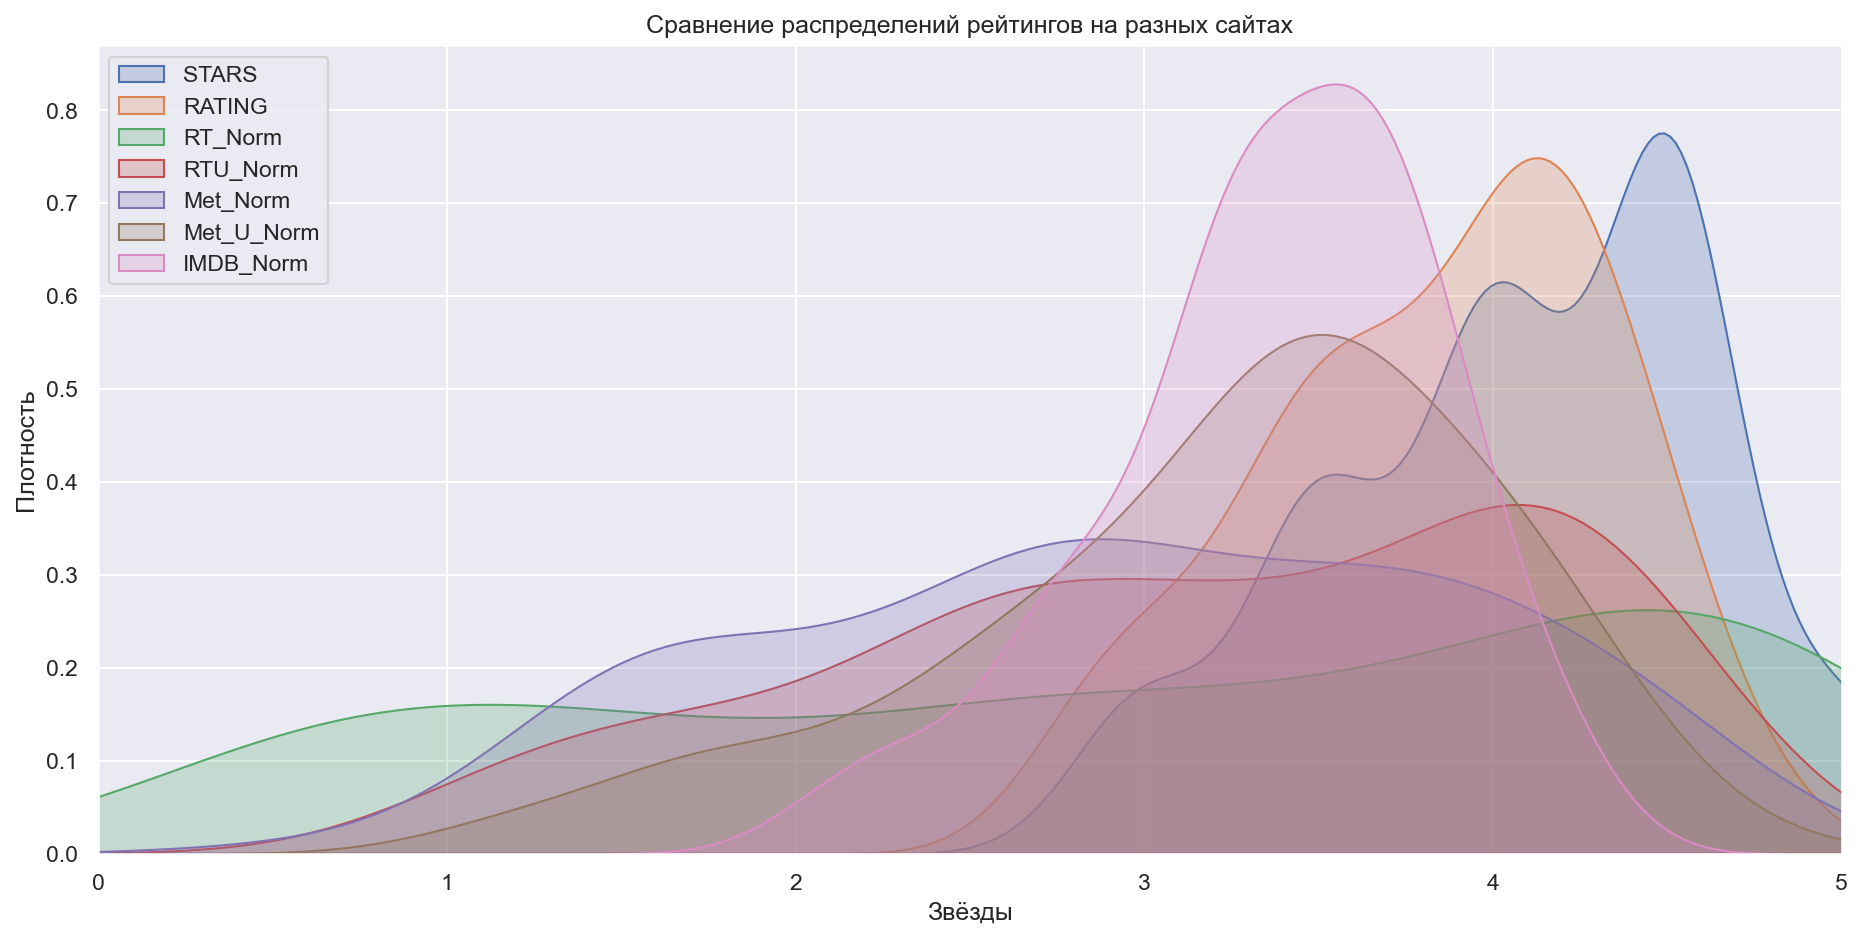

In [102]:
plt.figure(figsize=(15, 7), dpi=150)
sns.set(style='darkgrid')

for grade in assessments:
    sns.kdeplot(data=norm_scores, x=grade, fill=True, label=grade)

plt.title('Сравнение распределений рейтингов на разных сайтах')
plt.xlabel('Звёзды')
plt.ylabel('Плотность')
plt.xlim(0, 5)

plt.legend(loc='upper left')
plt.show()

In [103]:
colums = ['STARS', 'RT_Norm']

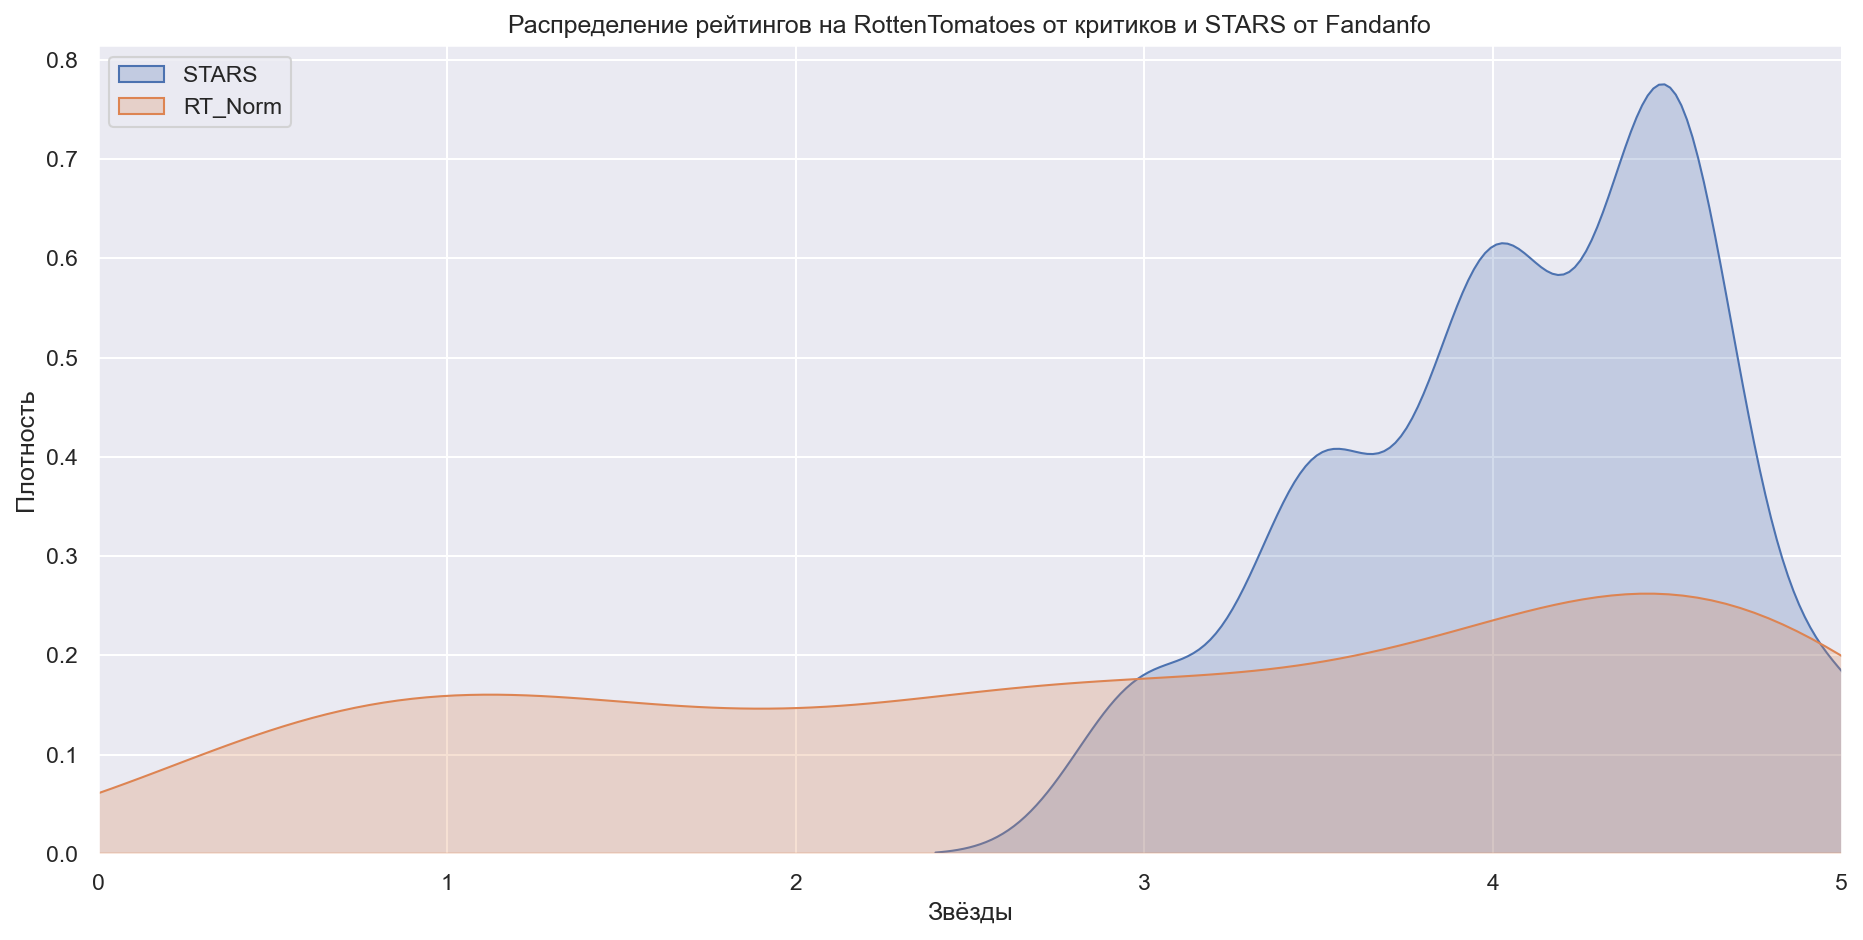

In [104]:
plt.figure(figsize=(15, 7), dpi=150)
sns.set(style='darkgrid')

for grade in colums:
    sns.kdeplot(data=norm_scores, x=grade, fill=True, label=grade)

plt.title('Распределение рейтингов на RottenTomatoes от критиков и STARS от Fandanfo')
plt.xlabel('Звёзды')
plt.ylabel('Плотность')
plt.xlim(0, 5)

plt.legend(loc='upper left')
plt.show()

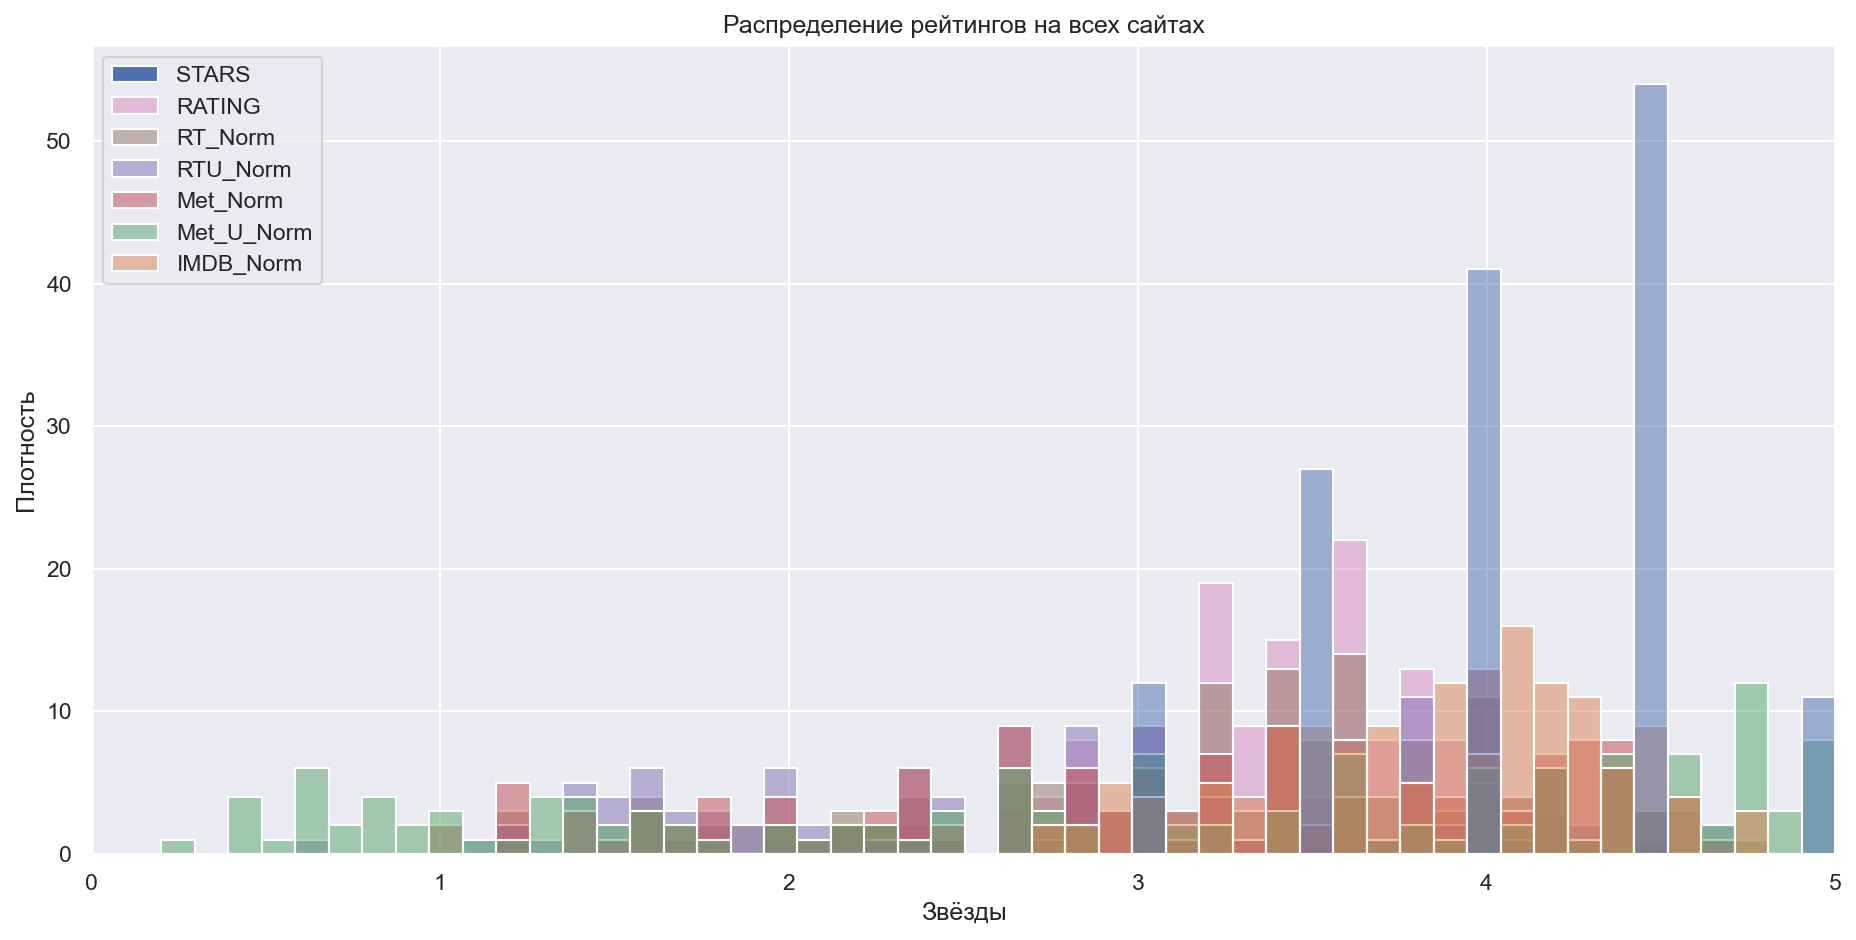

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7), dpi=150)
sns.set(style='darkgrid')

sns.histplot(data=norm_scores, bins=50, fill=True)

plt.title('Распределение рейтингов на всех сайтах')
plt.xlabel('Звёзды')
plt.ylabel('Плотность')
plt.xlim(0, 5)

plt.legend(labels=assessments, loc='upper left')
plt.show()


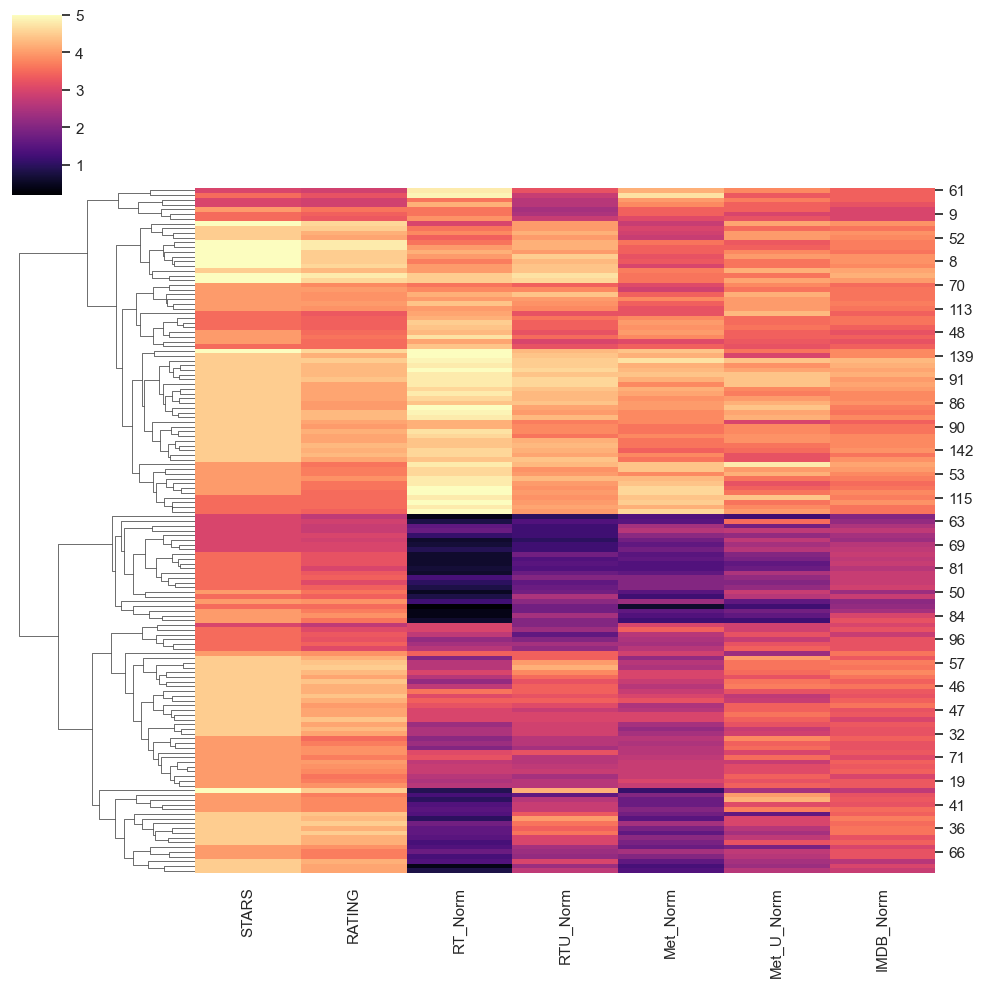

In [106]:
# Отображение фильмов, которые получили низкие оценки в кластерном формате
sns.clustermap(norm_scores, cmap='magma', col_cluster=False)
plt.show()

### Из графика видно, что рейтинги фильмов на сайте Fandango систематически завышают, по сравнению с другими сайтами

In [107]:
norm_films = df[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 
                  'Met_Norm', 'Met_U_Norm', 'IMDB_Norm', 'FILM']]
norm_films.head()

,STARS,RATING,RT_Norm,RTU_Norm,Met_Norm,Met_U_Norm,IMDB_Norm,FILM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)


In [108]:
# Топ 10 фильмов с наименьшими рейтингами по колонке 
worst_films = norm_films.nsmallest(10, 'RT_Norm')
worst_films

,STARS,RATING,RT_Norm,RTU_Norm,Met_Norm,Met_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


In [109]:
assessments = ['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 
               'Met_Norm', 'Met_U_Norm', 'IMDB_Norm', ]

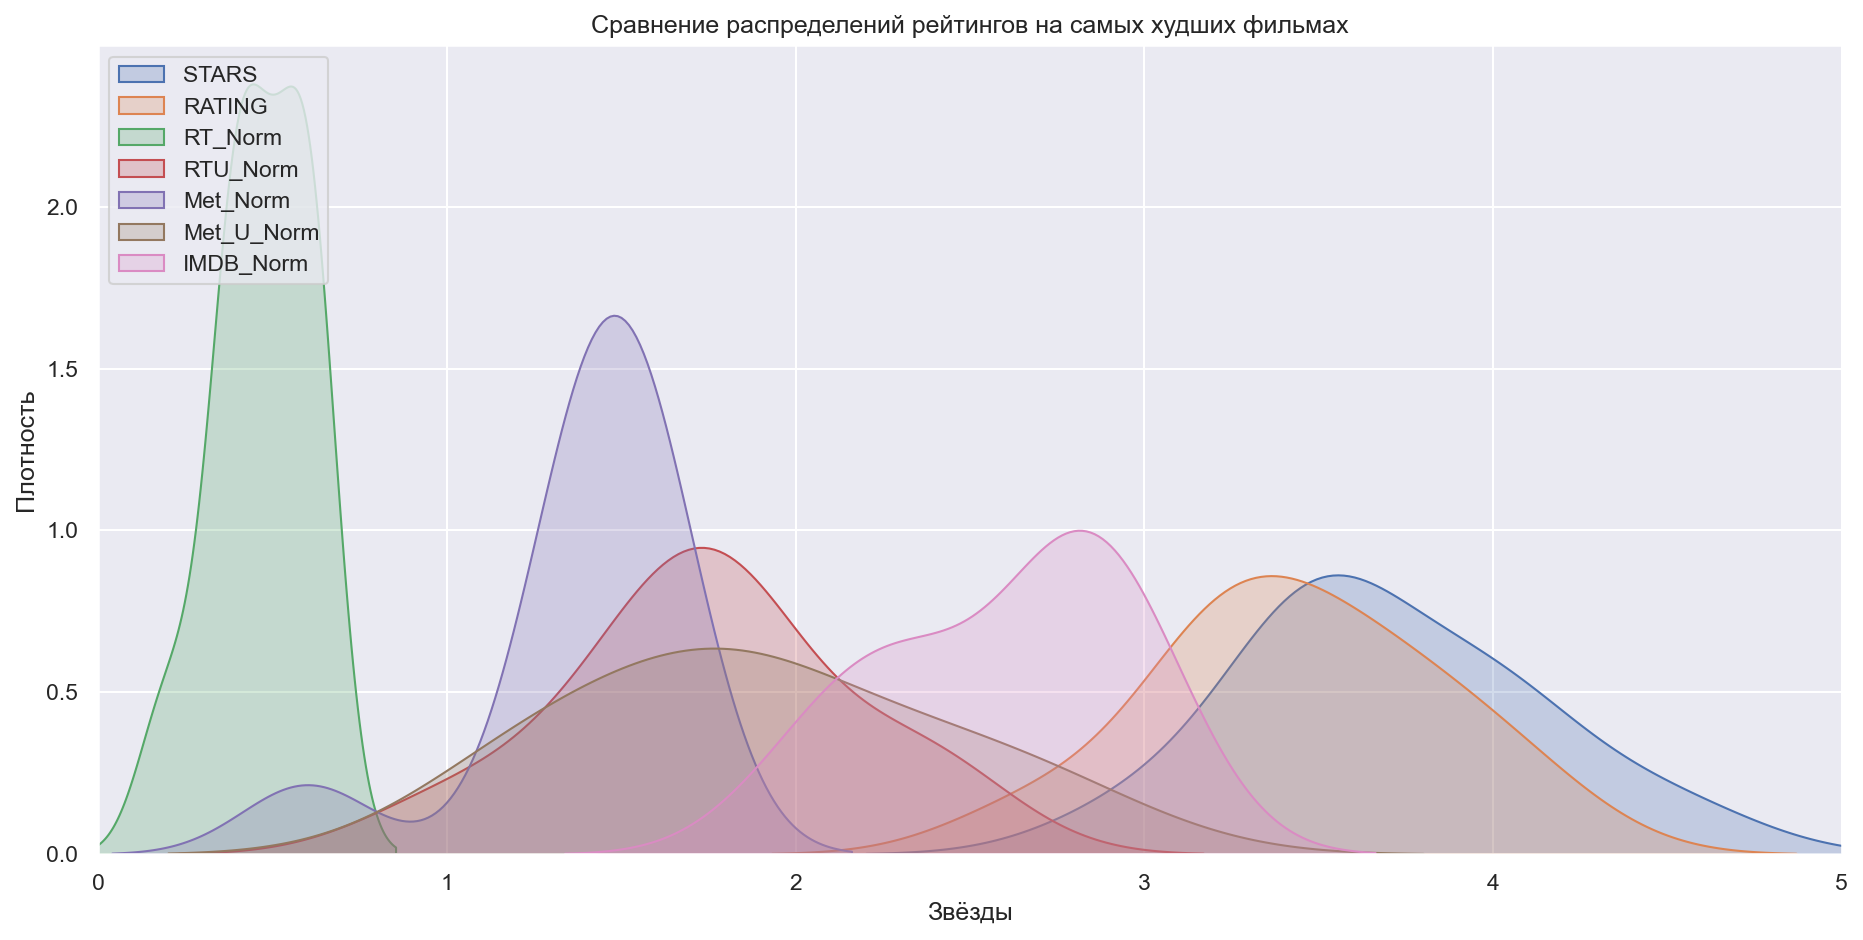

In [110]:
plt.figure(figsize=(15, 7), dpi=150)
sns.set(style='darkgrid')

for grade in assessments:
    sns.kdeplot(data=worst_films, x=grade, fill=True, label=grade)

plt.title('Сравнение распределений рейтингов на самых худших фильмах')
plt.xlabel('Звёзды')
plt.ylabel('Плотность')
plt.xlim(0, 5)

plt.legend(loc='upper left')
plt.show()

In [111]:
# явный пример того, как Fandango завышает рейтинги фильмов
worst_films.loc[25]

STARS                    4.5
RATING                   4.1
RT_Norm                  0.4
RTU_Norm                 2.3
Met_Norm                 1.3
Met_U_Norm               2.3
IMDB_Norm                3.0
FILM          Taken 3 (2015)
Name: 25, dtype: object

# 6. Вывод

### Исходя из данных из файлов "fandango_scrape" и "all_sites_scores", подтверждается предположение о завышении рейтингов фильмов на платформе Fandango. В данных оценок фильмов на Fandango (столбец 'STARS') видно, что рейтинги фильмов в среднем выше, чем на других популярных платформах, таких как RottenTomatoes, Metacritic и IMDB. Это может быть интерпретировано как попытка платформы Fandango увеличить привлекательность фильмов для потенциальных зрителей и, следовательно, увеличить свою прибыль за счёт продажи билетов. Таким образом, предположение о завышении рейтингов фильмов на Fandango подтверждается имеющимися данными.